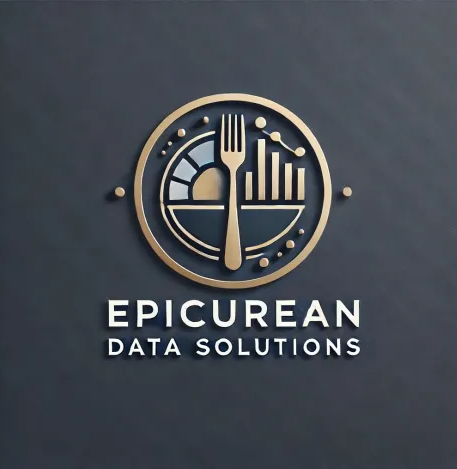

# Analisis preliminar para detectar la calidad de los datos



In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

### Carga de los datos de reviews de California a analizar

In [3]:
# Especifica la ruta de la carpeta donde están los archivos JSON
folder_path = r'C:\Users\Usuario\Desktop\HENRY\PROYECTO FINAL\Proyecto Final\datasets\Google Maps\review-estados\review-California'

# Obtiene los todos los archivos de la carpeta
files = os.listdir(folder_path)
dataframes = []

# Leer cada archivo JSON línea por línea
for file_name in files:
    if file_name.endswith('.json'):  # Asegurarse de que solo se lean los archivos JSON
        file_path = os.path.join(folder_path, file_name)
        try:
            df = pd.read_json(file_path, lines=True)  # Leer el archivo JSON línea por línea
            dataframes.append(df)
        except ValueError as e:
            print(f"Error leyendo {file_name}: {e}")

# Concatenar todos los DataFrames en uno solo
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df



,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
...,...,...,...,...,...,...,...,...
2699995,1.113423e+20,Byunguk Kim,1573362674409,5,None,None,None,0x80c2bea30829f279:0x39aa953ee93734ed
2699996,1.080818e+20,Ceveda Craytonhooks,1580608853411,5,Beautiful salon. The staff and atmosphere were...,None,None,0x8094675073616747:0x9f935a9b9046a9ba
2699997,1.175914e+20,Natacha Thompson,1528597806165,5,Flo is a great beautician. She is very patie...,[{'url': ['https://lh5.googleusercontent.com/p...,"{'time': 1528598932831, 'text': 'Thank you! I...",0x8094675073616747:0x9f935a9b9046a9ba
2699998,1.124266e+20,Eleanor Aikins,1551203379295,5,I Been going to have a variety of hair style a...,None,None,0x8094675073616747:0x9f935a9b9046a9ba


### Visualizacion grafica de los valores faltantes, se representan los mismos en amarillo por cada columna

user_id          0
name             0
time             0
rating           0
text       1170964
pics       2600710
resp       2454831
gmap_id          0
dtype: int64


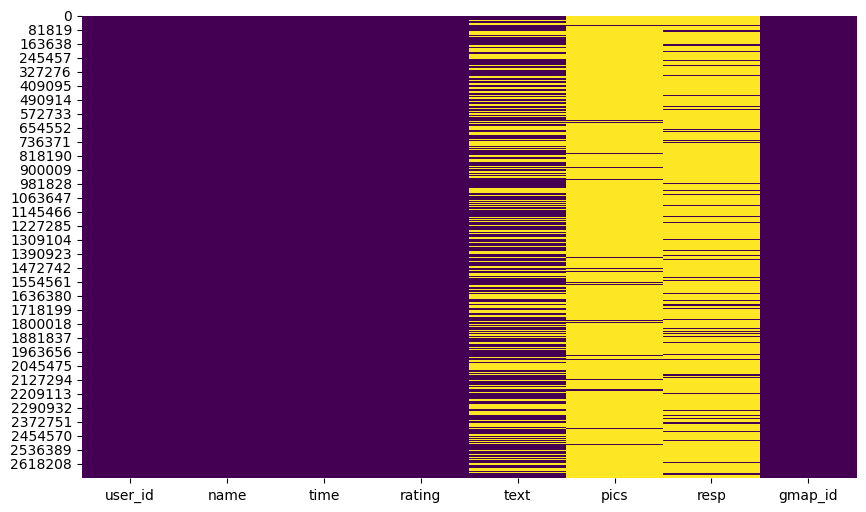

In [4]:
# Verificar valores nulos en todas las columnas
null_counts = combined_df.isnull().sum()
print(null_counts)

# Visualización grafica de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis')
plt.show()


Las columnas user_id, name, time, y rating no presentan ningún valor nulo.
Esto es importante porque son columnas clave para el análisis y no tendrás que lidiar con la imputación o eliminación de valores faltantes en ellas. Las columnas text, pics, resp, y gmap_id contienen una cantidad considerable de valores nulos. text: Aunque hay valores faltantes, parece que la mayoría de las filas tienen un comentario asociado, lo cual es bueno para el análisis de sentimientos o la generación de insights de clientes.
pics: Casi todos los valores en esta columna son nulos, lo que sugiere que los clientes no suelen incluir imágenes en sus reseñas.
resp: Muchas reseñas no tienen una respuesta, lo que indica una falta de interacción o seguimiento por parte de los negocios.
gmap_id: Tiene muchos valores faltantes, lo cual podría limitar el análisis geográfico o la vinculación con ubicaciones específicas.

### Hacemos una pequeña transformacion y limpieza para un manejo mas optimo de los datos

In [5]:
# Eliminar la columna 'pics' ya que no la necesitamos para este analisis
combined_df.drop(columns=['pics'], inplace=True)

# Convertir los diccionarios en la columna 'resp' a cadenas de texto
combined_df['resp'] = combined_df['resp'].apply(lambda x: str(x) if isinstance(x, dict) else x)

# Convertir la columna 'time' a formato de fecha
combined_df['time'] = pd.to_datetime(combined_df['time'], unit='ms')

# Mostrar la cantidad de duplicados antes de eliminarlos
duplicados = combined_df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

# Eliminar duplicados
combined_df.drop_duplicates(inplace=True)

Cantidad de filas duplicadas: 75243


In [6]:
# Verificar si todas las columnas tienen el tipo de dato adecuado
print(combined_df.dtypes)

user_id           float64
name               object
time       datetime64[ns]
rating              int64
text               object
resp               object
gmap_id            object
dtype: object


In [7]:
# Calcular la cantidad de valores nulos por columna
valores_nulos = combined_df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

# Calcular el porcentaje de valores nulos
porcentaje_nulos = (valores_nulos / len(combined_df)) * 100
print("\nPorcentaje de valores nulos por columna:")
print(porcentaje_nulos)


Valores nulos por columna:
user_id          0
name             0
time             0
rating           0
text       1163823
resp       2386300
gmap_id          0
dtype: int64

Porcentaje de valores nulos por columna:
user_id     0.000000
name        0.000000
time        0.000000
rating      0.000000
text       44.340219
resp       90.915083
gmap_id     0.000000
dtype: float64


In [8]:
combined_df.head()

,user_id,name,time,rating,text,resp,gmap_id
0,1.089912e+20,Song Ro,2021-01-06 05:12:07.056,5,Love there korean rice cake.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,1.112903e+20,Rafa Robles,2021-02-09 05:47:28.663,5,Good very good,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,1.126404e+20,David Han,2020-03-08 05:04:42.296,4,They make Korean traditional food very properly.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,1.174403e+20,Anthony Kim,2019-03-07 05:56:56.355,5,Short ribs are very delicious.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,1.005808e+20,Mario Marzouk,2017-05-16 05:01:41.933,5,Great food and prices the portions are large,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49


### Buscamos outliers en la columna "time" y los eliminamos para analizar los datos correctos

***"Las reseñas en Google Maps se lanzaron en junio de 2007, cuando Google permitió que los usuarios comenzaran a agregar opiniones directamente en los perfiles de los negocios en la plataforma."***


Fuente: https://reviewgrower.com/add-edit-or-delete-google-maps-reviews/

In [9]:
# Asegurarse de que la columna 'time' esté en formato datetime
combined_df['time'] = pd.to_datetime(combined_df['time'], errors='coerce')

# Verificar si hay valores nulos después de convertir a datetime (indican errores de conversión)
nulos_time = combined_df['time'].isnull().sum()
print(f"Valores nulos en 'time' después de la conversión a datetime: {nulos_time}")

# Si hay valores nulos en 'time', se pueden mostrar o eliminar
if nulos_time > 0:
    print("\nFilas con valores nulos en 'time':")
    print(combined_df[combined_df['time'].isnull()])

# Detectar outliers en 'time' (fechas fuera de un rango razonable)
# Establecemos un rango razonable, por ejemplo desde 2000 hasta el presente
min_date = pd.to_datetime('2007-06-01')
max_date = pd.to_datetime('today')

# Filtrar las filas que tienen fechas fuera de este rango
outliers_time = combined_df[(combined_df['time'] < min_date) | (combined_df['time'] > max_date)]

print(f"\nCantidad de outliers en 'time' fuera del rango {min_date} a {max_date}: {len(outliers_time)}")

# Mostrar las filas que tienen fechas como outliers
if len(outliers_time) > 0:
    print("\nOutliers detectados en 'time':")
    print(outliers_time[['time']])

# Verificar cantidad de columnas con outliers
print(f"\nAntes de limpiar los outliers, el DataFrame tiene {len(combined_df)} filas.")

# Eliminamos estos outliers
combined_df = combined_df[(combined_df['time'] >= min_date) & (combined_df['time'] <= max_date)]

# Confirmar que no queden outliers en la columna 'time'
print(f"\nDespués de limpiar los outliers, el DataFrame tiene {len(combined_df)} filas.")


Valores nulos en 'time' después de la conversión a datetime: 0

Cantidad de outliers en 'time' fuera del rango 2007-06-01 00:00:00 a 2024-09-11 16:46:33.507031: 183

Outliers detectados en 'time':
              time
2279    2005-03-03
39049   2005-03-14
42814   2006-01-01
56521   2006-03-20
63019   2007-04-10
...            ...
2610072 2007-03-21
2610073 2005-03-12
2655127 2007-04-03
2655134 2005-03-27
2655225 2006-04-16

[183 rows x 1 columns]

Antes de limpiar los outliers, el DataFrame tiene 2624757 filas.

Después de limpiar los outliers, el DataFrame tiene 2624574 filas.


### Buscamos datos erroneos en "ratings", los cuales se deberia encontrar entre los valores 1 y 5 (solo enteros)

In [10]:
# Identificar valores únicos en 'rating'
print(combined_df['rating'].unique())

# Verificar si hay valores fuera del rango esperado
combined_df = combined_df[(combined_df['rating'] >= 1) & (combined_df['rating'] <= 5)]

[5 4 1 2 3]


# Pasaremos ahora a visualizar la relacion entre los datos.

### Visualización grafica de la calidad y fecha de las reseñas

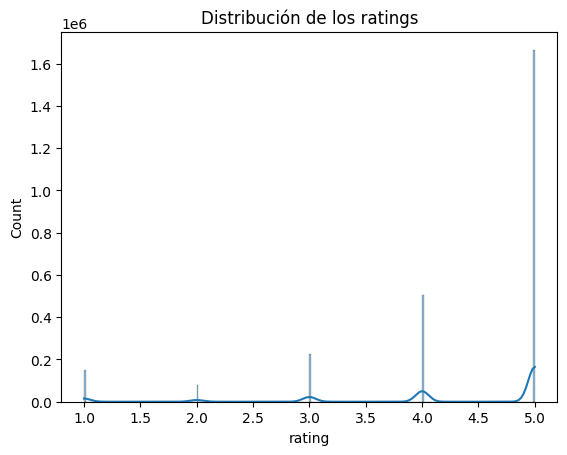

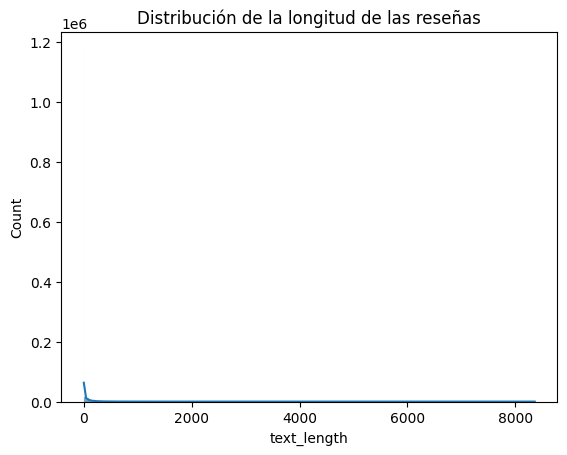

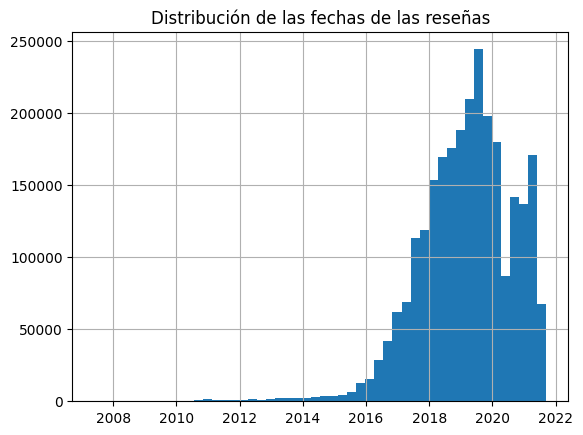

In [11]:
# Longitud de las reseñas
combined_df.loc[:, 'text_length'] = combined_df['text'].apply(lambda x: len(str(x)))

# Distribución de los ratings
sns.histplot(combined_df['rating'], kde=True)
plt.title('Distribución de los ratings')
plt.show()

# Longitud de las reseñas
sns.histplot(combined_df['text_length'], kde=True)
plt.title('Distribución de la longitud de las reseñas')
plt.show()

# Análisis de fechas
combined_df['time'].hist(bins=50)
plt.title('Distribución de las fechas de las reseñas')
plt.show()


### Para analizar el contenido de las reseñas, normalizamos la columna "text" y creamos "cleaned_text".

In [12]:
# Función para limpiar el texto
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Eliminar saltos de línea
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres especiales
    return text.lower()  # Convertir todo a minúsculas

# Aplicar la función solo si el texto no es nulo utilizando .loc para evitar el warning
combined_df.loc[:, 'cleaned_text'] = combined_df['text'].apply(lambda x: clean_text(x) if pd.notnull(x) else x)

# Ver las primeras filas después de la limpieza
combined_df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,Love there korean rice cake.,love there korean rice cake
1,Good very good,good very good
2,They make Korean traditional food very properly.,they make korean traditional food very properly
3,Short ribs are very delicious.,short ribs are very delicious
4,Great food and prices the portions are large,great food and prices the portions are large


### Generamos una nube de con las palabras mas utilizadas en las reseñas para visualizar

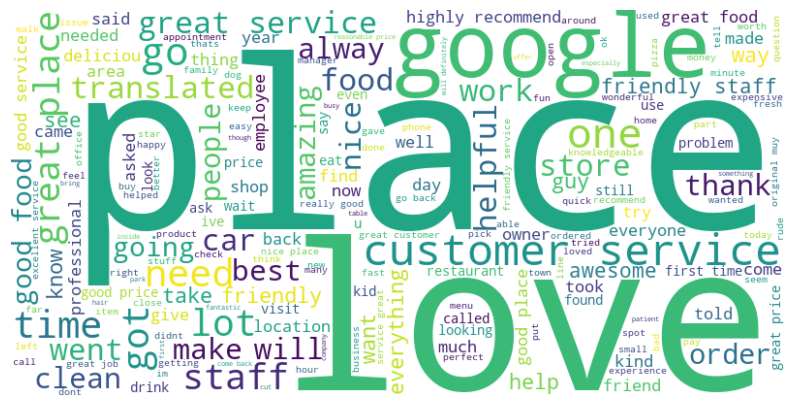

In [13]:
# Unir todos los textos en una sola cadena
all_text = ' '.join(combined_df['cleaned_text'].dropna())

# Generar una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Generamos una nube de palabras para las reseñas con ratings mas altos (5) y mas bajos (1), para comparar las diferencias.

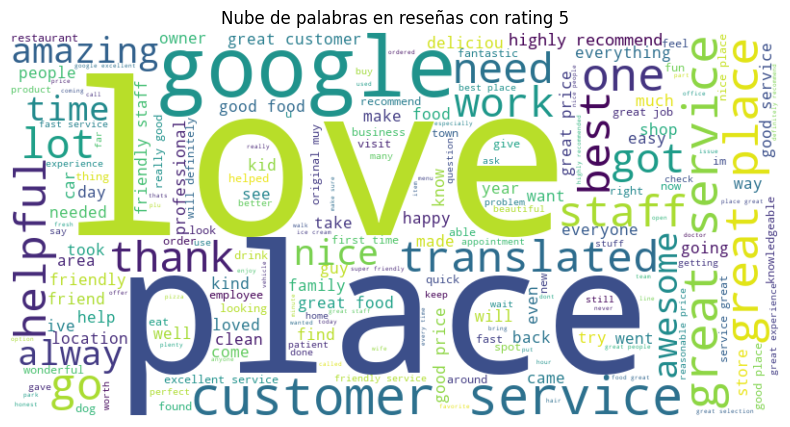

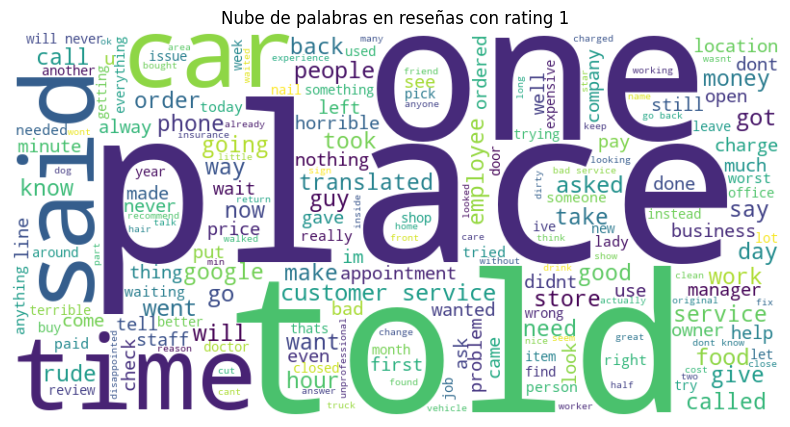

In [14]:
# Filtrar las reseñas positivas (rating = 5) y negativas (rating = 1)
positive_reviews = ' '.join(combined_df[combined_df['rating'] == 5]['cleaned_text'].dropna())
negative_reviews = ' '.join(combined_df[combined_df['rating'] == 1]['cleaned_text'].dropna())

# Crear una nube de palabras para las reseñas positivas
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras en reseñas con rating 5')
plt.show()

# Crear una nube de palabras para las reseñas negativas
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras en reseñas con rating 1')
plt.show()

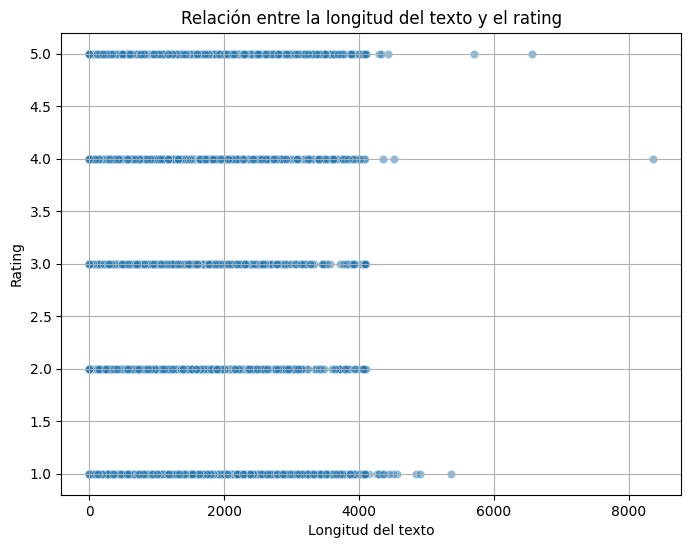

In [15]:
# Crear una nueva columna que almacena la longitud del texto en 'text'
combined_df['text_length'] = combined_df['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Gráfico de dispersión entre 'rating' y 'text_length'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='rating', data=combined_df, alpha=0.5)

# Ajustar título y etiquetas
plt.title('Relación entre la longitud del texto y el rating')
plt.xlabel('Longitud del texto')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

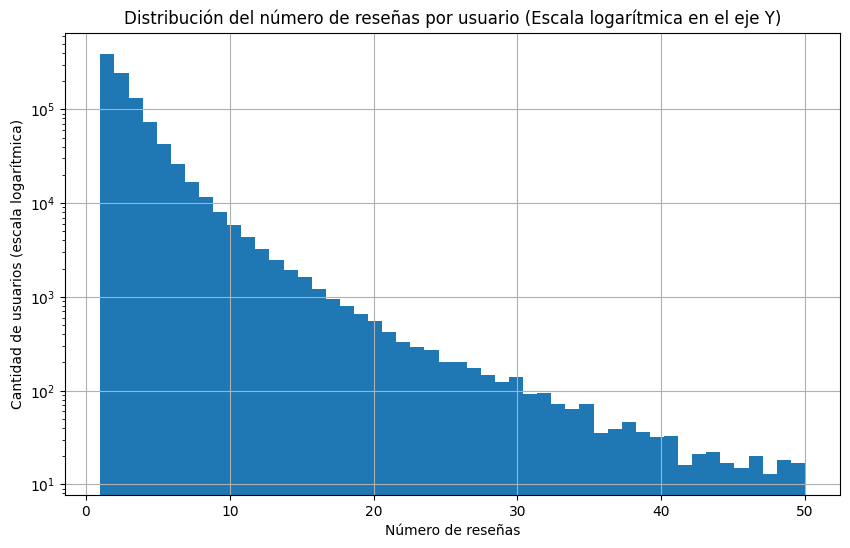

In [16]:
# Contar cuántas reseñas ha hecho cada usuario
user_review_counts = combined_df['user_id'].value_counts()

# Ajustar el gráfico con límites y escala logarítmica
plt.figure(figsize=(10, 6))

# Histograma con el número de reseñas por usuario, limitando el rango en el eje X
user_review_counts.hist(bins=50, range=(1, 50))

# Aplicar escala logarítmica al eje Y
plt.yscale('log')

# Títulos y etiquetas
plt.title('Distribución del número de reseñas por usuario (Escala logarítmica en el eje Y)')
plt.xlabel('Número de reseñas')
plt.ylabel('Cantidad de usuarios (escala logarítmica)')

# Mostrar el gráfico
plt.show()


Reseñas con respuesta: 238456


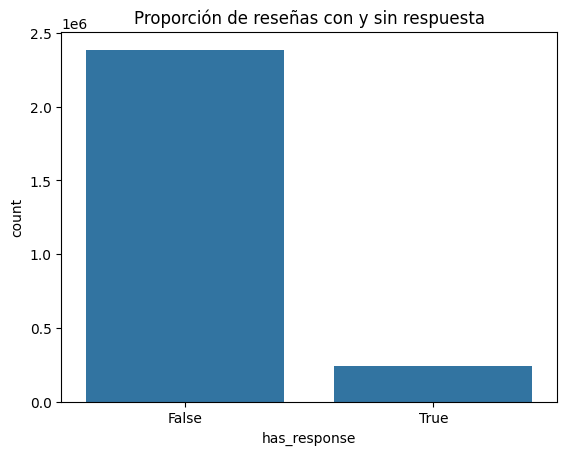

In [17]:
# Contar cuántas reseñas tienen una respuesta
resp_counts = combined_df['resp'].notnull().sum()
print(f"Reseñas con respuesta: {resp_counts}")

# Visualización de la proporción de reseñas con y sin respuesta
combined_df['has_response'] = combined_df['resp'].notnull()

sns.countplot(x='has_response', data=combined_df)
plt.title('Proporción de reseñas con y sin respuesta')
plt.show()


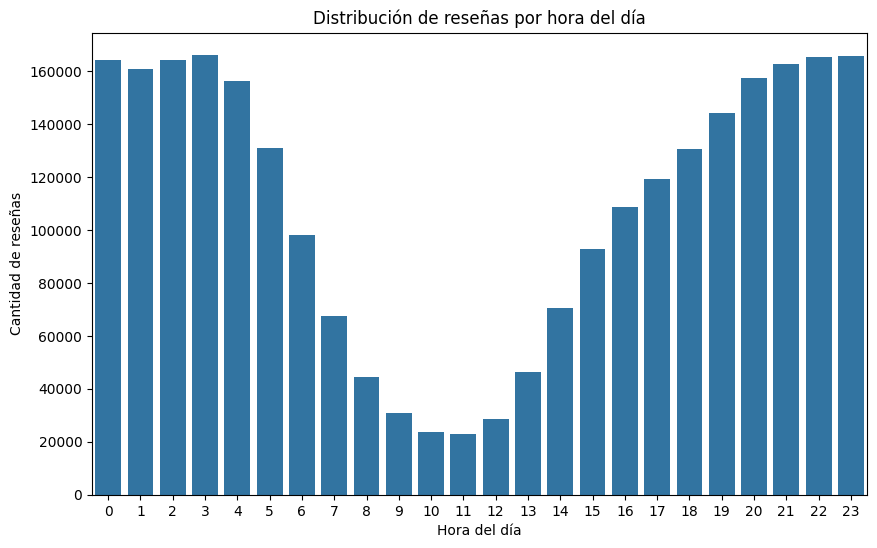

In [18]:
# Extraer la hora del día de la columna 'time'
combined_df['hour'] = combined_df['time'].dt.hour
# Graficar la distribución de reseñas por hora
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=combined_df)

# Añadir etiquetas y título
plt.title('Distribución de reseñas por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de reseñas')

# Mostrar el gráfico
plt.show()

In [19]:
#Tasa de Retención de Usuarios Activos = (Número de usuarios que dejaron al menos una reseña en los últimos X meses / Número total de usuarios activos en el mes inicial) * 100



#Suponiendo que el DataFrame tiene una columna 'user_id' y 'time' (fecha de la reseña)

# Filtrar usuarios que dejaron reseñas en un mes específico (ejemplo: enero de 2023)
from datetime import datetime

# Periodo inicial: seleccionar usuarios que dejaron reseñas en enero de 2023
inicio_periodo = '2020-01-01'
fin_periodo = '2020-01-31'
usuarios_iniciales = combined_df[(combined_df['time'] >= inicio_periodo) & (combined_df['time'] <= fin_periodo)]['user_id'].unique()

# Periodo de seguimiento: usuarios que dejaron reseñas en los 6 meses siguientes (febrero - julio)
inicio_seguimiento = '2020-02-01'
fin_seguimiento = '2020-07-31'
usuarios_seguimiento = combined_df[(combined_df['time'] >= inicio_seguimiento) & (combined_df['time'] <= fin_seguimiento)]['user_id'].unique()

# Calcular usuarios que dejaron reseñas en ambos periodos
usuarios_retenidos = set(usuarios_iniciales).intersection(set(usuarios_seguimiento))

# Tasa de retención
tasa_retencion = (len(usuarios_retenidos) / len(usuarios_iniciales)) * 100

print(f"KPI - Tasa de Retención de Usuarios Activos: {tasa_retencion:.2f}%")


KPI - Tasa de Retención de Usuarios Activos: 25.40%
